In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Pre_data = pd.read_csv("C:\\Users\\2019A00303\\Desktop\\Code\\Airbnb Project\\Data\\PreProcessingSeoul.csv")
Pre_data

,Unnamed: 0,accommodates,bedrooms,bathrooms,minstay,latitude,longitude,Entire home/apt,Private room,Shared room,price
0,1,1,1.0,1.0,2.0,37.555893,126.928023,0.0,1.0,0.0,46
1,2,2,0.0,1.0,1.0,37.576998,126.997793,1.0,0.0,0.0,151
2,3,6,1.0,1.0,1.0,37.575486,126.990546,0.0,0.0,1.0,14
3,5,2,1.0,1.0,1.0,37.577029,126.990747,0.0,1.0,0.0,36
4,7,2,1.0,0.0,2.0,37.555285,126.927202,0.0,1.0,0.0,59
...,...,...,...,...,...,...,...,...,...,...,...
3935,8131,3,1.0,1.0,6.0,37.536277,126.900778,1.0,0.0,0.0,48
3936,8180,4,1.0,1.0,1.0,37.540162,126.946361,1.0,0.0,0.0,75
3937,8193,3,0.0,1.0,1.0,37.472949,127.039993,1.0,0.0,0.0,41
3938,8245,4,1.0,1.0,1.0,37.550713,126.914019,1.0,0.0,0.0,65


In [2]:
Pre_data['group'] = pd.cut(x=Pre_data['price'],
bins=[0, 30, 60, 90, 120, 8000],
labels=['group_1','group_2','group_3','group_4','group_5'])
Pre_data.head()

,Unnamed: 0,accommodates,bedrooms,bathrooms,minstay,latitude,longitude,Entire home/apt,Private room,Shared room,price,group
0,1,1,1.0,1.0,2.0,37.555893,126.928023,0.0,1.0,0.0,46,group_2
1,2,2,0.0,1.0,1.0,37.576998,126.997793,1.0,0.0,0.0,151,group_5
2,3,6,1.0,1.0,1.0,37.575486,126.990546,0.0,0.0,1.0,14,group_1
3,5,2,1.0,1.0,1.0,37.577029,126.990747,0.0,1.0,0.0,36,group_2
4,7,2,1.0,0.0,2.0,37.555285,126.927202,0.0,1.0,0.0,59,group_2


In [3]:
#Instance selection & partitioning

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(Pre_data, Pre_data["group"]):
    train = Pre_data.loc[train_index]
    test = Pre_data.loc[test_index]

In [4]:
train['group'].value_counts() / len(train)

group_2    0.417513
group_3    0.282995
group_1    0.179251
group_5    0.069797
group_4    0.050444
Name: group, dtype: float64

In [5]:
test['group'].value_counts() / len(test)

group_2    0.417513
group_3    0.282995
group_1    0.178934
group_5    0.069797
group_4    0.050761
Name: group, dtype: float64

In [6]:
train.drop('group', axis=1, inplace=True)
train.head()

,Unnamed: 0,accommodates,bedrooms,bathrooms,minstay,latitude,longitude,Entire home/apt,Private room,Shared room,price
2119,3572,2,0.0,1.0,2.0,37.499058,127.027901,1.0,0.0,0.0,65
2361,4039,12,4.0,2.0,2.0,37.584675,126.986513,1.0,0.0,0.0,608
1500,2464,4,1.0,2.0,1.0,37.581864,126.970755,0.0,1.0,0.0,47
2849,4966,4,1.0,2.0,1.0,37.555586,126.930560,0.0,0.0,1.0,12
140,208,1,1.0,2.0,15.0,37.554395,126.919558,0.0,1.0,0.0,20


In [7]:
test.drop(['Unnamed: 0','group'], axis=1, inplace=True)
test.head()

,accommodates,bedrooms,bathrooms,minstay,latitude,longitude,Entire home/apt,Private room,Shared room,price
1796,2,1.0,1.0,2.0,37.512446,127.109762,0.0,1.0,0.0,34
702,3,0.0,1.0,2.0,37.564901,126.927480,1.0,0.0,0.0,65
3622,5,1.0,1.0,1.0,37.557767,126.810541,1.0,0.0,0.0,34
3707,4,1.0,1.0,2.0,37.553068,126.937191,0.0,1.0,0.0,53
218,2,1.0,2.0,1.0,37.517533,127.027462,0.0,1.0,0.0,53


In [8]:
train_y = train[['price']]
train_y.head()

,price
2119,65
2361,608
1500,47
2849,12
140,20


In [9]:
train.drop(['Unnamed: 0', 'price'], axis=1, inplace=True)
train_X = train
train_X.head()

,accommodates,bedrooms,bathrooms,minstay,latitude,longitude,Entire home/apt,Private room,Shared room
2119,2,0.0,1.0,2.0,37.499058,127.027901,1.0,0.0,0.0
2361,12,4.0,2.0,2.0,37.584675,126.986513,1.0,0.0,0.0
1500,4,1.0,2.0,1.0,37.581864,126.970755,0.0,1.0,0.0
2849,4,1.0,2.0,1.0,37.555586,126.930560,0.0,0.0,1.0
140,1,1.0,2.0,15.0,37.554395,126.919558,0.0,1.0,0.0


In [10]:
test_y= test[['price']]
test_y.head()

,price
1796,34
702,65
3622,34
3707,53
218,53


In [11]:
test.drop('price', axis=1, inplace=True)
test_X = test
test_X.head()

,accommodates,bedrooms,bathrooms,minstay,latitude,longitude,Entire home/apt,Private room,Shared room
1796,2,1.0,1.0,2.0,37.512446,127.109762,0.0,1.0,0.0
702,3,0.0,1.0,2.0,37.564901,126.927480,1.0,0.0,0.0
3622,5,1.0,1.0,1.0,37.557767,126.810541,1.0,0.0,0.0
3707,4,1.0,1.0,2.0,37.553068,126.937191,0.0,1.0,0.0
218,2,1.0,2.0,1.0,37.517533,127.027462,0.0,1.0,0.0


In [15]:
#Select a model
from sklearn.linear_model import LinearRegression

l_reg = LinearRegression()
l_reg.fit(train_X, train_y)

LinearRegression()

In [16]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

predictions = l_reg.predict(train_X)
mse = mean_squared_error(train_y, predictions)
mae = mean_absolute_error(train_y, predictions)
rmse = np.sqrt(mse)
print(mse, rmse, mae)

21081.926807451466 145.19616664172463 24.271605150792993


In [17]:
predictions = l_reg.predict(test_X)
mse = mean_squared_error(test_y, predictions)
mae = mean_absolute_error(test_y, predictions)
rmse = np.sqrt(mse)
print(mse, rmse, mae)

1615.5978246593186 40.19449993045465 21.79718031369951


In [18]:
from sklearn.tree import DecisionTreeRegressor

d_reg = DecisionTreeRegressor()
d_reg.fit(train_X, train_y)

DecisionTreeRegressor()

In [19]:
predictions = d_reg.predict(train_X)
mse = mean_squared_error(train_y, predictions)
mae = mean_absolute_error(train_y, predictions)
rmse = np.sqrt(mse)
print(mse, rmse, mae)

0.0 0.0 0.0


In [20]:
predictions = d_reg.predict(test_X)
mse = mean_squared_error(test_y, predictions)
mae = mean_absolute_error(test_y, predictions)
rmse = np.sqrt(mse)
print(mse, rmse, mae)

1845.5774111675128 42.96018402157412 19.950507614213198


In [21]:
from sklearn.ensemble import RandomForestRegressor

r_reg = RandomForestRegressor()
r_reg.fit(train_X, train_y)

C:\Users\2019A0~1\AppData\Local\Temp/ipykernel_8996/806139679.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  r_reg.fit(train_X, train_y)


RandomForestRegressor()

In [22]:
predictions = r_reg.predict(train_X)
mse = mean_squared_error(train_y, predictions)
mae = mean_absolute_error(train_y, predictions)
rmse = np.sqrt(mse)
print(mse, rmse, mae)

3345.947881757615 57.84416895208725 7.983937182741117


In [23]:
predictions = r_reg.predict(test_X)
mse = mean_squared_error(test_y, predictions)
mae = mean_absolute_error(test_y, predictions)
rmse = np.sqrt(mse)
print(mse, rmse, mae)

1627.021937817259 40.336359997119956 16.566548223350253


In [24]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(train_X, train_y)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

In [25]:
predictions = svr.predict(train_X)
mse = mean_squared_error(train_y, predictions)
mae = mean_absolute_error(train_y, predictions)
rmse = np.sqrt(mse)
print(mse, rmse, mae)

22169.68962556238 148.8948945584179 28.928893778836677


In [26]:
predictions = svr.predict(test_X)
mse = mean_squared_error(test_y, predictions)
mae = mean_absolute_error(test_y, predictions)
rmse = np.sqrt(mse)
print(mse, rmse, mae)

2368.6811023353093 48.66909802261913 26.235771692532875


In [27]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(train_X, train_y)

KNeighborsRegressor()

In [28]:
predictions = knn.predict(train_X)
mse = mean_squared_error(train_y, predictions)
mae = mean_absolute_error(train_y, predictions)
rmse = np.sqrt(mse)
print(mse, rmse, mae)

15287.141104060918 123.64117883642535 18.06986040609137


In [29]:
predictions = knn.predict(test_X)
mse = mean_squared_error(test_y, predictions)
mae = mean_absolute_error(test_y, predictions)
rmse = np.sqrt(mse)
print(mse, rmse, mae)

1520.7751269035534 38.99711690501688 18.479187817258882


In [30]:
from sklearn.neural_network import MLPRegressor

ann = MLPRegressor()
ann.fit(train_X, train_y)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


MLPRegressor()

In [31]:
predictions = ann.predict(train_X)
mse = mean_squared_error(train_y, predictions)
mae = mean_absolute_error(train_y, predictions)
rmse = np.sqrt(mse)
print(mse, rmse, mae)

21118.238480757787 145.32115634262544 23.923972272748482


In [32]:
predictions = ann.predict(test_X)
mse = mean_squared_error(test_y, predictions)
mae = mean_absolute_error(test_y, predictions)
rmse = np.sqrt(mse)
print(mse, rmse, mae)

1632.6791775882814 40.40642495430995 21.723015799452373


In [30]:
# ##그리드서치 랜덤포레스트

# from sklearn.model_selection import GridSearchCV

# param = {'n_estimators' : [800,900,1000], 'max_features' : ['sqrt','auto','log2'], 'max_depth' : [8,9,10],
#          'min_samples_split': [2,3,4]}

# r_reg = RandomForestRegressor(random_state=42)

# search = GridSearchCV(r_reg, param, cv=5,
#                       scoring='neg_mean_absolute_error')
                      
# search.fit(train_X, train_y['price'].ravel())

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [8, 9, 10],
                         'max_features': ['sqrt', 'auto', 'log2'],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [800, 900, 1000]},
             scoring='neg_mean_squared_error')

In [31]:
# print(search.best_score_, search.best_params_)

-21441.077221457825 {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 800}


In [ ]:
##그리드서치 SVR

# from sklearn.model_selection import GridSearchCV

# param = {'n_estimators' : [100, 200, 300], 'max_features' : [6, 8, 10], 'max_depth' : [10]}

# svr = SVR(random_state=42)

# search = GridSearchCV(svr, param, cv=5,
#                       scoring='neg_mean_squared_error')
# search.fit(train_X, train_y['price'].ravel())

In [143]:
# search.best_params_

In [33]:
r_reg = RandomForestRegressor(bootstrap=True,
                              min_samples_split=2,
                              criterion='mse',
                              max_depth=None,
                              max_features='log2',
                              n_estimators=900,
                              random_state=42,
                              )
r_reg.fit(train_X, train_y['price'].ravel())

RandomForestRegressor(max_features='log2', n_estimators=900, random_state=42)

In [42]:
predictions = r_reg.predict(train_X)
mse = mean_squared_error(train_y, predictions)
mae = mean_absolute_error(train_y, predictions)
rmse = np.sqrt(mse)
print(mse, rmse, mae)
r_reg.score(test_X, test_y)

3321.488754249717 57.632358569207604 7.381443438646802


0.46133775423722145

C:\Users\2019A0~1\AppData\Local\Temp/ipykernel_8996/2580640077.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  r_reg.fit(train_X, train_y)
C:\Users\2019A0~1\AppData\Local\Temp/ipykernel_8996/2580640077.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  r_reg.fit(train_X, train_y)
C:\Users\2019A0~1\AppData\Local\Temp/ipykernel_8996/2580640077.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  r_reg.fit(train_X, train_y)
C:\Users\2019A0~1\AppData\Local\Temp/ipykernel_8996/2580640077.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  r_reg.fit(tr

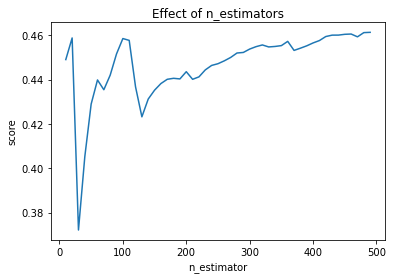

In [38]:
estimators = np.arange(10, 500, 10)
scores = []
for n in estimators:
    r_reg.set_params(n_estimators=n)
    r_reg.fit(train_X, train_y)
    scores.append(r_reg.score(test_X, test_y))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

('criterion',
 'max_depth',
 'min_samples_split',
 'min_samples_leaf',
 'min_weight_fraction_leaf',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_impurity_split',
 'random_state',
 'ccp_alpha')

In [152]:
# import pickle
# import joblib

# joblib.dump(r_reg, 'C:\\Users\\2019A00303\\Desktop\\Code\\Airbnb Project\\Model\\SeoulModel.pkl')

['C:\\Users\\2019A00303\\Desktop\\Code\\Airbnb Project\\Model\\SeoulModel.pkl']

Text(0.5, 0, 'Relative Importance')

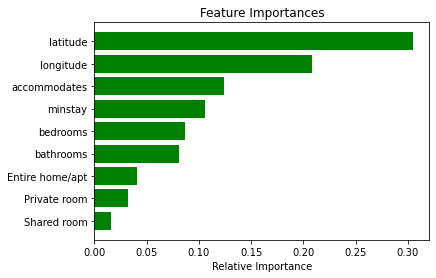

In [39]:
features = train_X.columns
importances = r_reg.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')